In [1]:
#Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#displaying all the columns
pd.set_option('display.max_columns', None)

#reading the file
data=pd.read_csv("fifa21_male2.csv")
data

ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  \
0            Udinese   71  LWB            LM   
1          KAS Eupen   70   CM    CM CAM CDM   
2      Coventry City   71  CAM  CAM RM RW LM   
3         Sunderland   70   ST           NaN   
4        Vissel Kobe   82  CAM        CM CAM   
...              ...  ...  ...           ...   
17120     CD Tondela   66   CB            CB   
17121        Burnley   58  CAM        CAM CM   
17122        Burnley   56   RB            RB   
17123  SK Sturm Graz   62   RB         RB LB   
17124          Lecce   61   ST            ST   

                                            Player Photo  \
0      https://cdn.sofifa.com/players/000/002/16_120.png   
1      https://cdn.sofifa.com/players/000/016/19_120.png   
2      https://cdn.sofifa.com/players/000/027/16_120.png   
3      https://cdn.sofifa.com/players/000/036/09_120.png   
4      https://cdn.sofifa.com/players/000/041/20_120.png   
...                                                  ...   
17120  https://cdn.sofifa.com/players/259/088/20_120.png   
17121  https://cdn.sofifa.com/players/259/090/20_120.png   
17122  https://cdn.sofifa.com/players/259/091/20_120.png   
17123  https://cdn.sofifa.com/players/259/101/20_120.png   
17124  https://cdn.sofifa.com/players/259/105/20_120.png   

                                              Club Logo  \
0          https://cdn.sofifa.com/teams/55/light_60.png   
1        https://cdn.sofifa.com/teams/2013/light_60.png   
2        https://cdn.sofifa.com/teams/1800/light_60.png   
3         https://cdn.sofifa.com/teams/106/light_60.png   
4      https://cdn.sofifa.com/teams/101146/light_60.png   
...                                                 ...   
17120  https://cdn.sofifa.com/teams/112516/light_60.png   
17121    https://cdn.sofifa.com/teams/1796/light_60.png   
17122    https://cdn.sofifa.com/teams/1796/light_60.png   
17123     https://cdn.sofifa.com/teams/209/light_60.png   
17124     https://cdn.sofifa.com/teams/347/light_60.png   

                                    Flag Photo  POT  \
0          https://cdn.sofifa.com/flags/it.png   69   
1          https://cdn.sofifa.com/flags/es.png   71   
2      https://cdn.sofifa.com/flags/gb-eng.png   71   
3          https://cdn.sofifa.com/flags/tt.png   82   
4          https://cdn.sofifa.com/flags/es.png   81   
...                                        ...  ...   
17120      https://cdn.sofifa.com/flags/fr.png   69   
17121  https://cdn.sofifa.com/flags/gb-wls.png   66   
17122  https://cdn.sofifa.com/flags/gb-eng.png   67   
17123      https://cdn.sofifa.com/flags/ba.png   73   
17124      https://cdn.sofifa.com/flags/es.png   74   

                       Team & Contract Height  Weight   foot  Growth  \
0                  Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   
1                KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0   
2            Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   
3                      Sunderland 2009  5'11"  165lbs  Right      14   
4              Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0   
...                                ...    ...     ...    ...     ...   
17120  CD Tondela Jun 30, 2021 On 

In [3]:
#listing columns
col_list=data.columns.tolist()
print(col_list)

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', '

In [4]:
#determine last year of contract

#contracts=data["Team & Contract"]
#data["contract_endyear"]=[contract[-4:] for contract in contracts]
#data["contract_endyear"]

In [5]:
#see unique values

for col in data.columns:
    print(col,"| number of unique values: ",data[col].nunique())

ID | number of unique values:  17125
Name | number of unique values:  16176
Age | number of unique values:  30
OVA | number of unique values:  50
Nationality | number of unique values:  167
Club | number of unique values:  917
BOV | number of unique values:  50
BP | number of unique values:  15
Position | number of unique values:  622
Player Photo | number of unique values:  17125
Club Logo | number of unique values:  918
Flag Photo | number of unique values:  167
POT | number of unique values:  47
Team & Contract | number of unique values:  9822
Height | number of unique values:  21
Weight | number of unique values:  57
foot | number of unique values:  2
Growth | number of unique values:  28
Joined | number of unique values:  1953
Loan Date End | number of unique values:  38
Value | number of unique values:  216
Wage | number of unique values:  142
Release Clause | number of unique values:  1200
Contract | number of unique values:  434
Attacking | number of unique values:  366
Crossin

In [6]:
#dropping unnecessary columns

data=data.drop(["ID","Player Photo","Club Logo","Flag Photo","Gender"],axis=1)
data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT                  Team & Contract Height  Weight  \
0      LWB            LM   69              Udinese 2008 ~ 2016   6'0"  181lbs   
1       CM    CM CAM CDM   71            KAS Eupen 2014 ~ 2019  5'10"  143lbs   
2      CAM  CAM RM RW LM   71        Coventry City 2016 ~ 2020   5'9"  161lbs   
3       ST           NaN   82                  Sunderland 2009  5'11"  165lbs   
4      CAM        CM CAM   81          Vissel Kobe 2018 ~ 2021   5'7"  150lbs   
...    ...           ...  ...                              ...    ...     ...   
17120   CB            CB   69  CD Tondela Jun 30, 2021 On Loan   6'6"  165lbs   
17121  CAM        CAM CM   66              Burnley 2020 ~ 2021  5'10"  170lbs   
17122   RB            RB   67              Burnley 2020 ~ 2022   5'9"  154lbs   
17123   RB         RB LB   73        SK Sturm Graz 2020 ~ 2023   5'9"  148lbs   
17124   ST            ST   74                Lecce 2020 ~ 2024  5'10"  154lbs   

        foot  Growth        Joined Loan Date End  Value  Wage Release Clause  \
0       Left       0   Jul 1, 2008           NaN  €625K   €7K             €0   
1      Right       0  Jul 19, 2014           NaN  €600K   €7K          €1.1M   
2      Right       0   Jan 7, 2016           NaN  €1.1M  €15K             €0   
3      Right      14           NaN           NaN     €0    €0             €0   
4      Right       0  Jul 16, 2018           NaN  €5.5M  €12K          €7.2M   
...      ...     ...           ...           ...    ...   ...            ...   
17120  Right       5  Sep 29, 2020  Jun 30, 2021  €550K   €2K             €0   
17121  Right      10  Aug 20, 2020           NaN  €130K   €3K          €273K   
17122  Right      11  Aug 20, 2020           NaN  €130K   €2K          €273K   
17123  Right      11  Sep 30, 2020           NaN  €475K   €3K          €784K   
17124  Right      15  Sep 30, 2020           NaN  €325K   €2K          €788K   

                   Contract  Attacking  Crossing  Finishing  Heading Accuracy  \
0               2008 ~ 2016        313        75         50                59   
1               2014 ~ 2019        337        68         64                61   
2               2016 ~ 2020        337        80         64                41   
3                      2009        264        54         70                60   
4               2018 ~ 2021        367        75         69                54   
...                     ...        ...       ...        ...               ...   
17120  Jun 30, 2021 On Loan        197        35         23                66   
17121           2020 ~ 2021        248        50         43                50   
17122           2020 ~ 2022        218        55         34                53   
17123           2020 ~ 2023        223        62         26                52   
17124           2020 ~ 2024        254        32         64                59   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                 71     58.0    338         73   65.0           60   
1                 76

In [7]:
#check out only Free and Loan contracts - viable players

#data_fl = data[data["contract_endyear"].isin(["Free", "Loan"])]
#data_fl

In [8]:
#working on ending contract years

#data = data[(data["contract_endyear"] != "Free")&(data["contract_endyear"] != "Loan")]
#data["contract_endyear"] = data["contract_endyear"].astype(int)
#data_2020 = data[data["contract_endyear"].astype(int) >= 2020]
#data_2020

In [9]:
#concatenate all viable players

data_final = data
data_final

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT                  Team & Contract Height  Weight  \
0      LWB            LM   69              Udinese 2008 ~ 2016   6'0"  181lbs   
1       CM    CM CAM CDM   71            KAS Eupen 2014 ~ 2019  5'10"  143lbs   
2      CAM  CAM RM RW LM   71        Coventry City 2016 ~ 2020   5'9"  161lbs   
3       ST           NaN   82                  Sunderland 2009  5'11"  165lbs   
4      CAM        CM CAM   81          Vissel Kobe 2018 ~ 2021   5'7"  150lbs   
...    ...           ...  ...                              ...    ...     ...   
17120   CB            CB   69  CD Tondela Jun 30, 2021 On Loan   6'6"  165lbs   
17121  CAM        CAM CM   66              Burnley 2020 ~ 2021  5'10"  170lbs   
17122   RB            RB   67              Burnley 2020 ~ 2022   5'9"  154lbs   
17123   RB         RB LB   73        SK Sturm Graz 2020 ~ 2023   5'9"  148lbs   
17124   ST            ST   74                Lecce 2020 ~ 2024  5'10"  154lbs   

        foot  Growth        Joined Loan Date End  Value  Wage Release Clause  \
0       Left       0   Jul 1, 2008           NaN  €625K   €7K             €0   
1      Right       0  Jul 19, 2014           NaN  €600K   €7K          €1.1M   
2      Right       0   Jan 7, 2016           NaN  €1.1M  €15K             €0   
3      Right      14           NaN           NaN     €0    €0             €0   
4      Right       0  Jul 16, 2018           NaN  €5.5M  €12K          €7.2M   
...      ...     ...           ...           ...    ...   ...            ...   
17120  Right       5  Sep 29, 2020  Jun 30, 2021  €550K   €2K             €0   
17121  Right      10  Aug 20, 2020           NaN  €130K   €3K          €273K   
17122  Right      11  Aug 20, 2020           NaN  €130K   €2K          €273K   
17123  Right      11  Sep 30, 2020           NaN  €475K   €3K          €784K   
17124  Right      15  Sep 30, 2020           NaN  €325K   €2K          €788K   

                   Contract  Attacking  Crossing  Finishing  Heading Accuracy  \
0               2008 ~ 2016        313        75         50                59   
1               2014 ~ 2019        337        68         64                61   
2               2016 ~ 2020        337        80         64                41   
3                      2009        264        54         70                60   
4               2018 ~ 2021        367        75         69                54   
...                     ...        ...       ...        ...               ...   
17120  Jun 30, 2021 On Loan        197        35         23                66   
17121           2020 ~ 2021        248        50         43                50   
17122           2020 ~ 2022        218        55         34                53   
17123           2020 ~ 2023        223        62         26                52   
17124           2020 ~ 2024        254        32         64                59   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                 71     58.0    338         73   65.0           60   
1                 76

In [10]:
#check all free players

#pd.set_option('display.max_rows', 50)
#data_final[data_final["contract_endyear"]=="Free"]

In [11]:
#Test1

#data_final[(data_final["POT"] > 80) & (data_final["contract_endyear"] == "Free") & (data_final["Age"] <25)]

In [12]:
#Test2

data_final[(data_final["POT"] > 85) & (data_final["Age"] <23)]

Name  Age  OVA  Nationality                    Club  BOV   BP  \
7042      E. Mammana   21   77    Argentina    Zenit St. Petersburg   77  CDM   
7269     M. Ødegaard   21   83       Norway             Real Madrid   85  CAM   
7281          Malcom   21   82       Brazil            FC Barcelona   82  CAM   
7758     J. Dilrosun   22   75  Netherlands              Hertha BSC   76   LM   
8014     S. Bergwijn   22   83  Netherlands       Tottenham Hotspur   84  CAM   
...              ...  ...  ...          ...                     ...  ...  ...   
16302      Evanilson   20   73       Brazil                FC Porto   75   ST   
16306       F. Wirtz   17   68      Germany     Bayer 04 Leverkusen   70  CAM   
16307  Luis Henrique   18   67       Brazil  Olympique de Marseille   68   ST   
16334        L. Netz   17   63      Germany              Hertha BSC   63   LB   
16812   B. Arrey-Mbi   17   60      Germany       Bayern München II   62   CB   

        Position  POT                     Team & Contract Height  Weight  \
7042          CB   88    Zenit St. Petersburg 2017 ~ 2022   6'0"  154lbs   
7269   CAM CM RM   89             Real Madrid 2015 ~ 2023  5'10"  150lbs   
7281          RW   89            FC Barcelona 2018 ~ 2023   5'8"  163lbs   
7758          LM   86              Hertha BSC 2018 ~ 2024   5'9"  163lbs   
8014    LM LW RM   88       Tottenham Hotspur 2020 ~ 2025  5'10"  172lbs   
...          ...  ...                                 ...    ...     ...   
16302         ST   87                FC Porto 2020 ~ 2025   6'4"  192lbs   
16306     CAM RM   88     Bayer 04 Leverkusen 2020 ~ 2022   5'9"  150lbs   
16307         RW   87  Olympique de Marseille 2020 ~ 2025  5'11"  163lbs   
16334      LB LM   86              Hertha BSC 2019 ~ 2021   6'2"  163lbs   
16812      CB LB   86       Bayern München II 2020 ~ 2022   6'2"  168lbs   

        foot  Growth        Joined Loan Date End   Value   Wage  \
7042   Right      11  Jul 31, 2017           NaN  €13.5M   €40K   
7269    Left       6  Apr 29, 2015           NaN    €36M  €135K   
7281    Left       7  Jul 24, 2018           NaN    €31M  €140K   
7758    Left      11   Jul 1, 2018           NaN  €11.5M   €33K   
8014   Right       5  Jan 29, 2020           NaN  €34.5M  €105K   
...      ...     ...           ...           ...     ...    ...   
16302  Right      14  Sep 11, 2020           NaN     €9M    €9K   
16306  Right      20  Jan 31, 2020           NaN   €1.8M    €3K   
16307  Right      20  Sep 25, 2020           NaN   €1.6M    €5K   
16334   Left      23   Jun 1, 2019           NaN   €750K   €500   
16812   Left      26   Jul 1, 2020           NaN   €425K   €500   

      Release Clause     Contract  Attacking  Crossing  Finishing  \
7042            €23M  2017 ~ 2022        275        65         28   
7269            €81M  2015 ~ 2023        366        84         74   
7281          €70.9M  2018 ~ 2023        362        79         75   
7758          €21.9M  2018 ~ 2024        311        73         74   
8014          €68.1M  2020 ~ 2025        374        78         77   
...              ...          ...        ...       ...        ...   
16302         €23.6M  2020 ~ 2025        327        32         79   
16306          €4.9M  2020 ~ 2022        294        59         66   
16307          €4.6M  2020 ~ 2025        304        60         66   
16334            €2M  2019 ~ 2021        228        66         38   
16812            €1M  2020 ~ 2022        204        34         25   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
7042                 66             80     36.0    296         65   44.0   
7269                 52             83     73.0    416         86   81.0   
7281                 57             80     71.0    401         85   77.0   
7758                 32             72     60.0    330         83   60.0   
8014                 60             84     75.0    378         87   78.0   
...                 ...            ...  

In [13]:
#Dealing with euros

# Replace K with 000
data_final["Value"] = data_final["Value"].str.replace("K", "000")
data_final["Wage"] = data_final["Wage"].str.replace("K", "000")
data_final["Release Clause"] = data_final["Release Clause"].str.replace("K", "000")
data_final["Hits"] = data_final["Hits"].str.replace("K", "000")

# Replace M with 000000
data_final["Value"] = data_final["Value"].str.replace("M", "000000")
data_final["Wage"] = data_final["Wage"].str.replace("M", "000000")
data_final["Release Clause"] = data_final["Release Clause"].str.replace("M", "000000")

# Remove .
data_final["Value"] = data_final["Value"].str.replace(".", "")
data_final["Wage"] = data_final["Wage"].str.replace(".", "")
data_final["Release Clause"] = data_final["Release Clause"].str.replace(".", "")
data_final["Hits"] = data_final["Hits"].str.replace(".", "")

# Remove €
data_final["Value"] = data_final["Value"].str.replace("€", "")
data_final["Wage"] = data_final["Wage"].str.replace("€", "")
data_final["Release Clause"] = data_final["Release Clause"].str.replace("€", "")

# Convert the column to numeric values
data_final["Value"] = pd.to_numeric(data_final["Value"])
data_final["Wage"] = pd.to_numeric(data_final["Wage"])
data_final["Release Clause"] = pd.to_numeric(data_final["Release Clause"])
data_final["Hits"] = pd.to_numeric(data_final["Hits"])


data_final

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT                  Team & Contract Height  Weight  \
0      LWB            LM   69              Udinese 2008 ~ 2016   6'0"  181lbs   
1       CM    CM CAM CDM   71            KAS Eupen 2014 ~ 2019  5'10"  143lbs   
2      CAM  CAM RM RW LM   71        Coventry City 2016 ~ 2020   5'9"  161lbs   
3       ST           NaN   82                  Sunderland 2009  5'11"  165lbs   
4      CAM        CM CAM   81          Vissel Kobe 2018 ~ 2021   5'7"  150lbs   
...    ...           ...  ...                              ...    ...     ...   
17120   CB            CB   69  CD Tondela Jun 30, 2021 On Loan   6'6"  165lbs   
17121  CAM        CAM CM   66              Burnley 2020 ~ 2021  5'10"  170lbs   
17122   RB            RB   67              Burnley 2020 ~ 2022   5'9"  154lbs   
17123   RB         RB LB   73        SK Sturm Graz 2020 ~ 2023   5'9"  148lbs   
17124   ST            ST   74                Lecce 2020 ~ 2024  5'10"  154lbs   

        foot  Growth        Joined Loan Date End     Value   Wage  \
0       Left       0   Jul 1, 2008           NaN    625000   7000   
1      Right       0  Jul 19, 2014           NaN    600000   7000   
2      Right       0   Jan 7, 2016           NaN  11000000  15000   
3      Right      14           NaN           NaN         0      0   
4      Right       0  Jul 16, 2018           NaN  55000000  12000   
...      ...     ...           ...           ...       ...    ...   
17120  Right       5  Sep 29, 2020  Jun 30, 2021    550000   2000   
17121  Right      10  Aug 20, 2020           NaN    130000   3000   
17122  Right      11  Aug 20, 2020           NaN    130000   2000   
17123  Right      11  Sep 30, 2020           NaN    475000   3000   
17124  Right      15  Sep 30, 2020           NaN    325000   2000   

       Release Clause              Contract  Attacking  Crossing  Finishing  \
0                   0           2008 ~ 2016        313        75         50   
1            11000000           2014 ~ 2019        337        68         64   
2                   0           2016 ~ 2020        337        80         64   
3                   0                  2009        264        54         70   
4            72000000           2018 ~ 2021        367        75         69   
...               ...                   ...        ...       ...        ...   
17120               0  Jun 30, 2021 On Loan        197        35         23   
17121          273000           2020 ~ 2021        248        50         43   
17122          273000           2020 ~ 2022        218        55         34   
17123          784000           2020 ~ 2023        223        62         26   
17124          788000           2020 ~ 2024        254        32         64   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                    59             71     58.0    338         73   65.0   
1                    61             76     68.0    369         69   79.0   
2                    41             77     75.0    387         79   84.0   
3             

In [14]:
columns_to_apply = ["W/F", 'SM', 'IR']+list(data_final.loc[:, "LS":"GK"].columns)

# loop through the columns and apply the functions
for col in columns_to_apply:
    # extract the numeric values from the column and assign to a new column
    data_final[col] = data_final[col].str.extract('(\d+)', expand=False).astype(int)
    
    # check if the column has a '+' sign and sum the values if true
    if '+' in data_final[col]:
        data_final[col] = data_final[col].str.split('+').apply(lambda x: sum(map(int, x)))

# display the updated DataFrame
data_final

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT                  Team & Contract Height  Weight  \
0      LWB            LM   69              Udinese 2008 ~ 2016   6'0"  181lbs   
1       CM    CM CAM CDM   71            KAS Eupen 2014 ~ 2019  5'10"  143lbs   
2      CAM  CAM RM RW LM   71        Coventry City 2016 ~ 2020   5'9"  161lbs   
3       ST           NaN   82                  Sunderland 2009  5'11"  165lbs   
4      CAM        CM CAM   81          Vissel Kobe 2018 ~ 2021   5'7"  150lbs   
...    ...           ...  ...                              ...    ...     ...   
17120   CB            CB   69  CD Tondela Jun 30, 2021 On Loan   6'6"  165lbs   
17121  CAM        CAM CM   66              Burnley 2020 ~ 2021  5'10"  170lbs   
17122   RB            RB   67              Burnley 2020 ~ 2022   5'9"  154lbs   
17123   RB         RB LB   73        SK Sturm Graz 2020 ~ 2023   5'9"  148lbs   
17124   ST            ST   74                Lecce 2020 ~ 2024  5'10"  154lbs   

        foot  Growth        Joined Loan Date End     Value   Wage  \
0       Left       0   Jul 1, 2008           NaN    625000   7000   
1      Right       0  Jul 19, 2014           NaN    600000   7000   
2      Right       0   Jan 7, 2016           NaN  11000000  15000   
3      Right      14           NaN           NaN         0      0   
4      Right       0  Jul 16, 2018           NaN  55000000  12000   
...      ...     ...           ...           ...       ...    ...   
17120  Right       5  Sep 29, 2020  Jun 30, 2021    550000   2000   
17121  Right      10  Aug 20, 2020           NaN    130000   3000   
17122  Right      11  Aug 20, 2020           NaN    130000   2000   
17123  Right      11  Sep 30, 2020           NaN    475000   3000   
17124  Right      15  Sep 30, 2020           NaN    325000   2000   

       Release Clause              Contract  Attacking  Crossing  Finishing  \
0                   0           2008 ~ 2016        313        75         50   
1            11000000           2014 ~ 2019        337        68         64   
2                   0           2016 ~ 2020        337        80         64   
3                   0                  2009        264        54         70   
4            72000000           2018 ~ 2021        367        75         69   
...               ...                   ...        ...       ...        ...   
17120               0  Jun 30, 2021 On Loan        197        35         23   
17121          273000           2020 ~ 2021        248        50         43   
17122          273000           2020 ~ 2022        218        55         34   
17123          784000           2020 ~ 2023        223        62         26   
17124          788000           2020 ~ 2024        254        32         64   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                    59             71     58.0    338         73   65.0   
1                    61             76     68.0    369         69   79.0   
2                    41             77     75.0    387         79   84.0   
3             

In [15]:
#find columns with floats like decimals, eg 50.0, 62.0 and so on
cols_to_convert = []
for col in data_final.columns:
    if data_final[col].dtype == 'float64' and data_final[col].apply(lambda x: x.is_integer()).any():
        cols_to_convert.append(col)
        
for col in cols_to_convert:
    data_final[col] = data_final[col].replace([np.nan, np.inf, -np.inf], [0, np.iinfo(np.int32).max, np.iinfo(np.int32).min])
    data_final[col] = pd.to_numeric(data_final[col], downcast='integer', errors='coerce')

data_final

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT                  Team & Contract Height  Weight  \
0      LWB            LM   69              Udinese 2008 ~ 2016   6'0"  181lbs   
1       CM    CM CAM CDM   71            KAS Eupen 2014 ~ 2019  5'10"  143lbs   
2      CAM  CAM RM RW LM   71        Coventry City 2016 ~ 2020   5'9"  161lbs   
3       ST           NaN   82                  Sunderland 2009  5'11"  165lbs   
4      CAM        CM CAM   81          Vissel Kobe 2018 ~ 2021   5'7"  150lbs   
...    ...           ...  ...                              ...    ...     ...   
17120   CB            CB   69  CD Tondela Jun 30, 2021 On Loan   6'6"  165lbs   
17121  CAM        CAM CM   66              Burnley 2020 ~ 2021  5'10"  170lbs   
17122   RB            RB   67              Burnley 2020 ~ 2022   5'9"  154lbs   
17123   RB         RB LB   73        SK Sturm Graz 2020 ~ 2023   5'9"  148lbs   
17124   ST            ST   74                Lecce 2020 ~ 2024  5'10"  154lbs   

        foot  Growth        Joined Loan Date End     Value   Wage  \
0       Left       0   Jul 1, 2008           NaN    625000   7000   
1      Right       0  Jul 19, 2014           NaN    600000   7000   
2      Right       0   Jan 7, 2016           NaN  11000000  15000   
3      Right      14           NaN           NaN         0      0   
4      Right       0  Jul 16, 2018           NaN  55000000  12000   
...      ...     ...           ...           ...       ...    ...   
17120  Right       5  Sep 29, 2020  Jun 30, 2021    550000   2000   
17121  Right      10  Aug 20, 2020           NaN    130000   3000   
17122  Right      11  Aug 20, 2020           NaN    130000   2000   
17123  Right      11  Sep 30, 2020           NaN    475000   3000   
17124  Right      15  Sep 30, 2020           NaN    325000   2000   

       Release Clause              Contract  Attacking  Crossing  Finishing  \
0                   0           2008 ~ 2016        313        75         50   
1            11000000           2014 ~ 2019        337        68         64   
2                   0           2016 ~ 2020        337        80         64   
3                   0                  2009        264        54         70   
4            72000000           2018 ~ 2021        367        75         69   
...               ...                   ...        ...       ...        ...   
17120               0  Jun 30, 2021 On Loan        197        35         23   
17121          273000           2020 ~ 2021        248        50         43   
17122          273000           2020 ~ 2022        218        55         34   
17123          784000           2020 ~ 2023        223        62         26   
17124          788000           2020 ~ 2024        254        32         64   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                    59             71       58    338         73     65   
1                    61             76       68    369         69     79   
2                    41             77       75    387         79     84   
3             

In [16]:
#convert height and weight
def convert_height(height):
    # extract the feet value from the string
    feet = int(height.split("'")[0])
    # extract the inches value from the string
    inches = int(height.split("'")[1].replace('"', ''))
    # convert feet and inches to total inches
    total_inches = feet * 12 + inches
    return total_inches

def convert_weight(weight):
    # extract the pounds value from the string
    pounds = int(weight.split('lbs')[0])
    return pounds

# apply the conversion functions to the columns "Height" and "Weight"
data_final['Height'] = data_final['Height'].apply(convert_height)
data_final['Weight']= data_final['Weight'].apply(convert_weight)

data_final

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT                  Team & Contract  Height  \
0      LWB            LM   69              Udinese 2008 ~ 2016      72   
1       CM    CM CAM CDM   71            KAS Eupen 2014 ~ 2019      70   
2      CAM  CAM RM RW LM   71        Coventry City 2016 ~ 2020      69   
3       ST           NaN   82                  Sunderland 2009      71   
4      CAM        CM CAM   81          Vissel Kobe 2018 ~ 2021      67   
...    ...           ...  ...                              ...     ...   
17120   CB            CB   69  CD Tondela Jun 30, 2021 On Loan      78   
17121  CAM        CAM CM   66              Burnley 2020 ~ 2021      70   
17122   RB            RB   67              Burnley 2020 ~ 2022      69   
17123   RB         RB LB   73        SK Sturm Graz 2020 ~ 2023      69   
17124   ST            ST   74                Lecce 2020 ~ 2024      70   

       Weight   foot  Growth        Joined Loan Date End     Value   Wage  \
0         181   Left       0   Jul 1, 2008           NaN    625000   7000   
1         143  Right       0  Jul 19, 2014           NaN    600000   7000   
2         161  Right       0   Jan 7, 2016           NaN  11000000  15000   
3         165  Right      14           NaN           NaN         0      0   
4         150  Right       0  Jul 16, 2018           NaN  55000000  12000   
...       ...    ...     ...           ...           ...       ...    ...   
17120     165  Right       5  Sep 29, 2020  Jun 30, 2021    550000   2000   
17121     170  Right      10  Aug 20, 2020           NaN    130000   3000   
17122     154  Right      11  Aug 20, 2020           NaN    130000   2000   
17123     148  Right      11  Sep 30, 2020           NaN    475000   3000   
17124     154  Right      15  Sep 30, 2020           NaN    325000   2000   

       Release Clause              Contract  Attacking  Crossing  Finishing  \
0                   0           2008 ~ 2016        313        75         50   
1            11000000           2014 ~ 2019        337        68         64   
2                   0           2016 ~ 2020        337        80         64   
3                   0                  2009        264        54         70   
4            72000000           2018 ~ 2021        367        75         69   
...               ...                   ...        ...       ...        ...   
17120               0  Jun 30, 2021 On Loan        197        35         23   
17121          273000           2020 ~ 2021        248        50         43   
17122          273000           2020 ~ 2022        218        55         34   
17123          784000           2020 ~ 2023        223        62         26   
17124          788000           2020 ~ 2024        254        32         64   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                    59             71       58    338         73     65   
1                    61             76       68    369         69     79   
2                    41             77       75    387         79     84   
3 

In [17]:
## creating plots for all numeric columns

#import matplotlib.pyplot as plt
#from scipy.stats import boxcox
#from sklearn.preprocessing import StandardScaler

# Get all numeric columns
#num_cols = data_final.select_dtypes(include='number').columns.tolist()

# Create a figure with multiple subplots
#fig, axs = plt.subplots(len(num_cols), 3, figsize=(15, len(num_cols) * 5))

# Loop through each numeric column
#for i, col in enumerate(num_cols):

    # Plot the histogram
#    axs[i, 0].hist(data_final[col], bins=1000)
#    axs[i, 0].set_title(f'{col} Histogram')

    # Apply Box-Cox transformation
#    transformed, lam = boxcox(data_final[col] + 1)
#    axs[i, 1].hist(transformed, bins=20)
#    axs[i, 1].set_title(f'{col} Box-Cox Transformed Histogram')

    # Apply StandardScaler normalization
 #   scaler = StandardScaler()
  #  scaled = scaler.fit_transform(data_final[[col]])
   # axs[i, 2].hist(scaled, bins=20)
    #axs[i, 2].set_title(f'{col} StandardScaler Normalized Histogram')

# Adjust the spacing between subplots
#plt.tight_layout()

# Show the plot
#plt.show()


In [18]:
numeric = data_final.select_dtypes(include=[np.number])
categoric = data_final.select_dtypes(include=[np.object])

In [19]:
#clean data nuls 
nulls_df=pd.DataFrame(numeric.isna().sum()/len(data)*100).reset_index() #formatar em tabela
nulls_df.columns=['column_name','percent_nulls']
    
columns_to_drop = nulls_df[nulls_df['percent_nulls']>=50]['column_name'].values
numeric = numeric.drop(columns_to_drop, axis=1)

for col in numeric.columns:
    numeric[col] = numeric[col].fillna(np.mean(numeric[col]))

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT                  Team & Contract  Height  \
0      LWB            LM   69              Udinese 2008 ~ 2016      72   
1       CM    CM CAM CDM   71            KAS Eupen 2014 ~ 2019      70   
2      CAM  CAM RM RW LM   71        Coventry City 2016 ~ 2020      69   
3       ST           NaN   82                  Sunderland 2009      71   
4      CAM        CM CAM   81          Vissel Kobe 2018 ~ 2021      67   
...    ...           ...  ...                              ...     ...   
17120   CB            CB   69  CD Tondela Jun 30, 2021 On Loan      78   
17121  CAM        CAM CM   66              Burnley 2020 ~ 2021      70   
17122   RB            RB   67              Burnley 2020 ~ 2022      69   
17123   RB         RB LB   73        SK Sturm Graz 2020 ~ 2023      69   
17124   ST            ST   74                Lecce 2020 ~ 2024      70   

       Weight   foot  Growth        Joined Loan Date End     Value   Wage  \
0         181   Left       0   Jul 1, 2008           NaN    625000   7000   
1         143  Right       0  Jul 19, 2014           NaN    600000   7000   
2         161  Right       0   Jan 7, 2016           NaN  11000000  15000   
3         165  Right      14           NaN           NaN         0      0   
4         150  Right       0  Jul 16, 2018           NaN  55000000  12000   
...       ...    ...     ...           ...           ...       ...    ...   
17120     165  Right       5  Sep 29, 2020  Jun 30, 2021    550000   2000   
17121     170  Right      10  Aug 20, 2020           NaN    130000   3000   
17122     154  Right      11  Aug 20, 2020           NaN    130000   2000   
17123     148  Right      11  Sep 30, 2020           NaN    475000   3000   
17124     154  Right      15  Sep 30, 2020           NaN    325000   2000   

       Release Clause              Contract  Attacking  Crossing  Finishing  \
0                   0           2008 ~ 2016        313        75         50   
1            11000000           2014 ~ 2019        337        68         64   
2                   0           2016 ~ 2020        337        80         64   
3                   0                  2009        264        54         70   
4            72000000           2018 ~ 2021        367        75         69   
...               ...                   ...        ...       ...        ...   
17120               0  Jun 30, 2021 On Loan        197        35         23   
17121          273000           2020 ~ 2021        248        50         43   
17122          273000           2020 ~ 2022        218        55         34   
17123          784000           2020 ~ 2023        223        62         26   
17124          788000           2020 ~ 2024        254        32         64   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                    59             71       58    338         73     65   
1                    61             76       68    369         69     79   
2                    41             77       75    387         79     84   
3 

In [20]:
numeric.corr()

Age       OVA       BOV       POT    Height    Weight    Growth  \
Age     1.000000  0.517099  0.456734 -0.237619  0.092935  0.258682 -0.850204   
OVA     0.517099  1.000000  0.985877  0.592268  0.027077  0.151834 -0.595585   
BOV     0.456734  0.985877  1.000000  0.628323  0.015950  0.132560 -0.542890   
POT    -0.237619  0.592268  0.628323  1.000000 -0.021094 -0.039809  0.294499   
Height  0.092935  0.027077  0.015950 -0.021094  1.000000  0.766072 -0.053145   
...          ...       ...       ...       ...       ...       ...       ...   
LCB     0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
CB      0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
RCB     0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
RB      0.150750  0.406816  0.436492  0.242243 -0.234484 -0.181250 -0.240999   
GK      0.158240  0.097549  0.050935  0.026755  0.348496  0.334569 -0.089024   

           Value      Wage  Release Clause  Attacking  Crossing  Finishing  \
Age     0.089949  0.200851        0.073432   0.183954  0.151022   0.105311   
OVA     0.519528  0.592925        0.573078   0.431238  0.386334   0.304012   
BOV     0.526055  0.592453        0.583340   0.464329  0.400046   0.336488   
POT     0.454159  0.462235        0.524035   0.233866  0.210944   0.173281   
Height -0.002578  0.020740       -0.000397  -0.354000 -0.493419  -0.359231   
...          ...       ...             ...        ...       ...        ...   
LCB     0.174643  0.223027        0.183727   0.489324  0.488504   0.105631   
CB      0.174643  0.223027        0.183727   0.489324  0.488504   0.105631   
RCB     0.174643  0.223027        0.183727   0.489324  0.488504   0.105631   
RB      0.209256  0.249632        0.224584   0.647000  0.696510   0.289717   
GK      0.036161  0.023661        0.040745  -0.738093 -0.627985  -0.557637   

        Heading Accuracy  Short Passing   Volleys     Skill  Dribbling  \
Age             0.172793       0.176786  0.176261  0.168876   0.039607   
OVA             0.305553       0.492372  0.352460  0.441689   0.350249   
BOV             0.335677       0.533046  0.376928  0.473888   0.388163   
POT             0.137199       0.318544  0.167395  0.265503   0.264651   
Height          0.061263      -0.352632 -0.330186 -0.455071  -0.484958   
...                  ...            ...       ...       ...        ...   
LCB             0.703029       0.661929  0.191176  0.497537   0.414363   
CB              0.703029       0.661929  0.191176  0.497537   0.414363   
RCB             0.703029       0.661929  0.191176  0.497537   0.414363   
RB              0.667142       0.792456  0.352759  0.682541   0.621561   
GK             -0.698657      -0.691746 -0.547457 -0.684169  -0.734537   

           Curve  FK Accuracy  Long Passing  Ball Control  Movement  \
Age     0.168669     0.223884      0.223088      0.121097 -0.055642   
OVA     0.387504     0.369278      0.482655      0.431284  0.302267   
BOV     0.406499     0.387289      0.515422      0.471454  0.335011   
POT     0.209485     0.166233      0.283647      0.292414  0.258243   
Height -0.435017    -0.399550     -0.315305     -0.411104 -0.632736   
...          ...          ...           ...           ...       ...   
LCB     0.342903     0.338474      0.662757      0.545690  0.257200   
CB      0.342903     0.338474      0.662757      0.545690  0.257200   
RCB     0.342903     0.338474      0.662757      0.545690  0.257200   
RB      0.529399     0.498801      0.768279      0.713761  0.505318   
GK     -0.564295    -0.507288     -0.535783     -0.761021 -0.542920   

        Acceleration  Sprint Speed   Agility  Reactions   Balance     Power  \
Age        -0.186610     -0.180717 -0.055110   0.501010 -0.098089  0.310459   
OVA         0.143928      0.153476  0.210835   0.870084  0.088880  0.546417   
BOV         0.179547      0.189491  0.237297   0.870157  0.113947  0.572275   
POT         0.197884      0.197396  0.170358   0.471139  

In [21]:
#####rever se é para dropar alguma coisa

###dropping by correlation
correlation=numeric.corr()
cols_to_drop = []
drop_next = False
for i in range(len(correlation.columns)):
    if drop_next:
        drop_next = False
        continue
    for j in range(i+1, len(correlation)):
        if correlation.iloc[i,j] == 1.0:
            pass
        elif correlation.iloc[i,j] > 0.9:
            cols_to_drop.append(correlation.columns[i])
            drop_next = True
            break

if not cols_to_drop:
    print('\033[1m' + "There are no high-correlation columns, thus no column was dropped." + '\033[1m')
else:
    numeric = numeric.drop(columns=cols_to_drop)
    print('\033[1m' + "The following high-correlation columns should were dropped: " + '\033[1m', cols_to_drop)
    print("""""")
    print("New numerical data: ")
    display(numeric)


The following high-correlation columns should were dropped:  ['OVA', 'Attacking', 'Finishing', 'Short Passing', 'Skill', 'Ball Control', 'Acceleration', 'Long Shots', 'Interceptions', 'Defending', 'Standing Tackle', 'Goalkeeping', 'GK Handling', 'GK Positioning', 'Total Stats', 'LS', 'RS', 'LF', 'RF', 'LAM', 'RAM', 'LCM', 'RCM', 'LWB', 'CDM', 'RWB', 'LCB', 'RCB']

New numerical data: 


Age  BOV  POT  Height  Weight  Growth     Value   Wage  Release Clause  \
0       33   71   69      72     181       0    625000   7000               0   
1       37   70   71      70     143       0    600000   7000        11000000   
2       33   71   71      69     161       0  11000000  15000               0   
3       36   70   82      71     165      14         0      0               0   
4       36   82   81      67     150       0  55000000  12000        72000000   
...    ...  ...  ...     ...     ...     ...       ...    ...             ...   
17120   22   66   69      78     165       5    550000   2000               0   
17121   18   58   66      70     170      10    130000   3000          273000   
17122   18   56   67      69     154      11    130000   2000          273000   
17123   20   62   73      69     148      11    475000   3000          784000   
17124   18   61   74      70     154      15    325000   2000          788000   

       Crossing  Heading Accuracy  Volleys  Dribbling  Curve  FK Accuracy  \
0            75                59       58         73     65           60   
1            68                61       68         69     79           79   
2            80                41       75         79     84           77   
3            54                60        0         68      0           46   
4            75                54       79         85     80           70   
...         ...               ...      ...        ...    ...          ...   
17120        35                66       26         44     26           33   
17121        50                50       41         57     42           50   
17122        55                53       34         52     43           34   
17123        62                52       23         55     43           46   
17124        32                59       54         57     45           48   

       Long Passing  Movement  Sprint Speed  Agility  Reactions  Balance  \
0                69       347            74       68         69       68   
1                71       305            50       62         65       72   
2                69       295            42       71         59       75   
3                64       176            62        0         55        0   
4                83       346            56       79         75       75   
...             ...       ...           ...      ...        ...      ...   
17120            34       243            55       46         48       42   
17121            61       298            63       52         54       68   
17122            36       308            61       54         59       68   
17123            57       349            70       74         56       77   
17124            30       317            72       59         53       65   

       Power  Shot Power  Jumping  Stamina  Strength  Mentality  Aggression  \
0        347          74       68       69        68        320          72   
1        324          75       54       64        60        362          71   
2        284          72       58       29        56        317          69   
3        239          63        0       51        66        271          59   
4        297          67       40       58        62        370          58   
...      ...         ...      ...      ...       ...        ...         ...   
17120    279          48       70       59        74        218          69   
17121    271          51       62       53        57        259          51   
17122    233          28       61       53        54        256          58   
17123    261          51       72       57        48        257          61   
17124    288          58       62       55        52        224          32   

       Positioning  Vision  Penalties  Composure  Marking  Sliding Tackle  \
0               63      66         50          0       70              69   
1               72      73         75         79       70              40   
2               

In [22]:
numeric.describe()

Age           BOV           POT        Height        Weight  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      25.272934     67.900204     72.489810     71.347620    165.658861   
std        4.942665      6.637538      5.769949      2.711241     15.818185   
min       16.000000     42.000000     47.000000     61.000000    110.000000   
25%       21.000000     64.000000     69.000000     69.000000    154.000000   
50%       25.000000     68.000000     72.000000     71.000000    165.000000   
75%       29.000000     72.000000     76.000000     73.000000    176.000000   
max       53.000000     93.000000     95.000000     81.000000    243.000000   

             Growth         Value           Wage  Release Clause  \
count  17125.000000  1.712500e+04   17125.000000    1.712500e+04   
mean       5.524788  1.513868e+07   10532.928467    3.955473e+07   
std        5.787539  3.872890e+07   21145.376646    9.794776e+07   
min       -1.000000  0.000000e+00       0.000000    0.000000e+00   
25%        0.000000  3.750000e+05    1000.000000    5.080000e+05   
50%        4.000000  8.000000e+05    3000.000000    1.100000e+07   
75%        9.000000  1.500000e+07   11000.000000    3.200000e+07   
max       26.000000  1.055000e+09  560000.000000    2.031000e+09   

           Crossing  Heading Accuracy       Volleys     Dribbling  \
count  17125.000000      17125.000000  17125.000000  17125.000000   
mean      51.621314         53.598832     44.853314     57.846423   
std       17.875715         16.947164     17.891540     18.047250   
min        6.000000          5.000000      0.000000      5.000000   
25%       41.000000         46.000000     32.000000     53.000000   
50%       56.000000         57.000000     46.000000     63.000000   
75%       65.000000         65.000000     59.000000     70.000000   
max       94.000000         93.000000     90.000000     96.000000   

              Curve   FK Accuracy  Long Passing      Movement  Sprint Speed  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      49.406774     44.387270     54.324321    322.693664     65.443036   
std       18.384542     17.504128     14.856911     54.933593     14.437377   
min        0.000000      5.000000      9.000000    113.000000     11.000000   
25%       37.000000     32.000000     45.000000    294.000000     59.000000   
50%       51.000000     43.000000     57.000000    331.000000     68.000000   
75%       64.000000     58.000000     65.000000    360.000000     75.000000   
max       94.000000     94.000000     93.000000    464.000000     96.000000   

            Agility     Reactions       Balance         Power    Shot Power  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      64.383474     62.924847     64.496409    302.414774     59.711416   
std       14.830890      9.037279     14.503628     49.380576     13.417931   
min        0.000000     24.000000      0.000000    128.000000     12.000000   
25%       57.000000     57.000000     57.000000    272.000000     50.000000   
50%       67.000000     63.000000     67.000000    308.000000     61.000000   
75%       75.000000     69.000000     75.000000    339.000000     70.000000   
max       96.000000     96.000000     97.000000    444.000000     95.000000   

            Jumping       Stamina      Strength     Mentality    Aggression  \
count  17125.000000  17125.000000  17125.000000  17125.000000  17125.000000   
mean      64.949489     63.309606     65.308555    261.922803     56.997839   
std       12.485823     15.313272     12.627212     62.913935     17.021619   
min        0.000000     11.000000     16.000000     50.000000      9.000000   
25%       58.000000     56.000000     58.000000    235.000000     45.000000   
50%       66.000000     66.000000     67.000000    269.000000     60.000000   
75%       73.000000     73.000000     74.000000    304.000000     70.000000   
max       95.

In [23]:
numeric["Value"]

0          625000
1          600000
2        11000000
3               0
4        55000000
           ...   
17120      550000
17121      130000
17122      130000
17123      475000
17124      325000
Name: Value, Length: 17125, dtype: int64

In [24]:
####test à parte 

data_filt=data_final[(data_final["Value"]<np.percentile(data_final["Value"], 50))&
                    (data_final["Wage"]<np.percentile(data_final["Wage"], 50))&
                    (data_final["Release Clause"]<np.percentile(data_final["Release Clause"], 25))&
                    (data_final["Age"]<23)&(data_final["POT"]>80)]
data_filt

############

Name  Age  OVA    Nationality                 Club  BOV   BP  \
8950   Welington Dano   20   81         Brazil               Brazil   81   LB   
10413    S. Szymański   21   69         Poland               Poland   70  CAM   
11140     J. Savarino   22   73      Venezuela            Venezuela   74  CAM   
12632       D. Levitt   19   63          Wales    Charlton Athletic   65  CAM   
14181        A. Gómez   18   63         Mexico          Boavista FC   63   LB   
14261    Pedro Brazão   17   62       Portugal    FC Lausanne-Sport   64  CAM   
14318        D. Leyva   17   56  United States  Seattle Sounders FC   59  CAM   
15510    S. Robertson   18   62       Scotland           Gillingham   63   LM   
15803     I. Vassilev   19   62  United States        Burton Albion   62   LW   
16882         C. Riad   17   59        Morocco       CE Sabadell FC   61   CB   

         Position  POT                         Team & Contract  Height  \
8950        LB LM   81                             Brazil Free      70   
10413      RM CAM   83                             Poland Free      69   
11140       RW RM   82                          Venezuela Free      67   
12632  CM CDM CAM   81  Charlton Athletic Jun 30, 2021 On Loan      71   
14181       LB CB   81        Boavista FC Jun 30, 2021 On Loan      72   
14261      RW CAM   81  FC Lausanne-Sport Jun 30, 2021 On Loan      68   
14318          CM   81         Seattle Sounders FC 2019 ~ 2021      70   
15510  CDM CM CAM   81         Gillingham Jun 30, 2021 On Loan      68   
15803    LW RW ST   82      Burton Albion Jun 30, 2021 On Loan      69   
16882          CB   84     CE Sabadell FC Jun 30, 2021 On Loan      70   

       Weight   foot  Growth        Joined Loan Date End   Value  Wage  \
8950      152   Left       0   Jan 1, 2019           NaN       0     0   
10413     132   Left      14  Jun 11, 2019           NaN       0     0   
11140     146  Right       9   Feb 7, 2020           NaN       0     0   
12632     163  Right      18  Apr 25, 2018  Jun 30, 2021  775000  1000   
14181     159   Left      18   Jul 1, 2019  Jun 30, 2021  700000   550   
14261     137   Left      19  Apr 20, 2019  Jun 30, 2021  600000   750   
14318     141  Right      25   Apr 9, 2019           NaN  200000   500   
15510     141   Left      19   Jul 1, 2018  Jun 30, 2021  600000   550   
15803     143   Left      20   Jul 1, 2019  Jun 30, 2021  650000  1000   
16882     154  Right      25   Jul 1, 2019  Jun 30, 2021  325000   500   

       Release Clause              Contract  Attacking  Crossing  Finishing  \
8950                0                  Free        327        82         51   
10413               0                  Free        278        67         58   
11140               0                  Free        309        64         69   
12632               0  Jun 30, 2021 On Loan        271        56         55   
14181               0  Jun 30, 2021 On Loan        233        53         32   
14261               0  Jun 30, 2021 On Loan        241        46         51   
14318          500000           2019 ~ 2021        228        35         55   
15510               0  Jun 30, 2021 On Loan        232        52         47   
15803               0  Jun 30, 2021 On Loan        275        60         64   
16882               0  Jun 30, 2021 On Loan        213        36         23   

       Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
8950                 69             78       47    361         77     83   
10413                40             66       47    343         72     69   
11140                43             70       63    327         77     65   
12632                42             66       52    301         59     62   
14181                63             58       27    225         62     39   
14261                41             56       47    315         72     64   
14318                45             58       35    238         47     40   
15510            

In [25]:
numeric

Age  BOV  POT  Height  Weight  Growth     Value   Wage  Release Clause  \
0       33   71   69      72     181       0    625000   7000               0   
1       37   70   71      70     143       0    600000   7000        11000000   
2       33   71   71      69     161       0  11000000  15000               0   
3       36   70   82      71     165      14         0      0               0   
4       36   82   81      67     150       0  55000000  12000        72000000   
...    ...  ...  ...     ...     ...     ...       ...    ...             ...   
17120   22   66   69      78     165       5    550000   2000               0   
17121   18   58   66      70     170      10    130000   3000          273000   
17122   18   56   67      69     154      11    130000   2000          273000   
17123   20   62   73      69     148      11    475000   3000          784000   
17124   18   61   74      70     154      15    325000   2000          788000   

       Crossing  Heading Accuracy  Volleys  Dribbling  Curve  FK Accuracy  \
0            75                59       58         73     65           60   
1            68                61       68         69     79           79   
2            80                41       75         79     84           77   
3            54                60        0         68      0           46   
4            75                54       79         85     80           70   
...         ...               ...      ...        ...    ...          ...   
17120        35                66       26         44     26           33   
17121        50                50       41         57     42           50   
17122        55                53       34         52     43           34   
17123        62                52       23         55     43           46   
17124        32                59       54         57     45           48   

       Long Passing  Movement  Sprint Speed  Agility  Reactions  Balance  \
0                69       347            74       68         69       68   
1                71       305            50       62         65       72   
2                69       295            42       71         59       75   
3                64       176            62        0         55        0   
4                83       346            56       79         75       75   
...             ...       ...           ...      ...        ...      ...   
17120            34       243            55       46         48       42   
17121            61       298            63       52         54       68   
17122            36       308            61       54         59       68   
17123            57       349            70       74         56       77   
17124            30       317            72       59         53       65   

       Power  Shot Power  Jumping  Stamina  Strength  Mentality  Aggression  \
0        347          74       68       69        68        320          72   
1        324          75       54       64        60        362          71   
2        284          72       58       29        56        317          69   
3        239          63        0       51        66        271          59   
4        297          67       40       58        62        370          58   
...      ...         ...      ...      ...       ...        ...         ...   
17120    279          48       70       59        74        218          69   
17121    271          51       62       53        57        259          51   
17122    233          28       61       53        54        256          58   
17123    261          51       72       57        48        257          61   
17124    288          58       62       55        52        224          32   

       Positioning  Vision  Penalties  Composure  Marking  Sliding Tackle  \
0               63      66         50          0       70              69   
1               72      73         75         79       70              40   
2               

In [26]:
categoric

Name            Nationality           Club   BP  \
0          G. Pasquale                  Italy        Udinese  LWB   
1          Luis García                  Spain      KAS Eupen   CM   
2              J. Cole                England  Coventry City  CAM   
3             D. Yorke  Trinidad &amp; Tobago     Sunderland   ST   
4              Iniesta                  Spain    Vissel Kobe  CAM   
...                ...                    ...            ...  ...   
17120       A. Medioub                 France     CD Tondela   CB   
17121       W. Rickard                  Wales        Burnley  CAM   
17122       C. Barrett                England        Burnley   RB   
17123   J. Gazibegović     Bosnia Herzegovina  SK Sturm Graz   RB   
17124  Pablo Rodríguez                  Spain          Lecce   ST   

           Position                  Team & Contract   foot        Joined  \
0                LM              Udinese 2008 ~ 2016   Left   Jul 1, 2008   
1        CM CAM CDM            KAS Eupen 2014 ~ 2019  Right  Jul 19, 2014   
2      CAM RM RW LM        Coventry City 2016 ~ 2020  Right   Jan 7, 2016   
3               NaN                  Sunderland 2009  Right           NaN   
4            CM CAM          Vissel Kobe 2018 ~ 2021  Right  Jul 16, 2018   
...             ...                              ...    ...           ...   
17120            CB  CD Tondela Jun 30, 2021 On Loan  Right  Sep 29, 2020   
17121        CAM CM              Burnley 2020 ~ 2021  Right  Aug 20, 2020   
17122            RB              Burnley 2020 ~ 2022  Right  Aug 20, 2020   
17123         RB LB        SK Sturm Graz 2020 ~ 2023  Right  Sep 30, 2020   
17124            ST                Lecce 2020 ~ 2024  Right  Sep 30, 2020   

      Loan Date End              Contract     A/W     D/W  
0               NaN           2008 ~ 2016  Medium    High  
1               NaN           2014 ~ 2019  Medium  Medium  
2               NaN           2016 ~ 2020  Medium     Low  
3               NaN                  2009     NaN     NaN  
4               NaN           2018 ~ 2021    High  Medium  
...             ...                   ...     ...     ...  
17120  Jun 30, 2021  Jun 30, 2021 On Loan  Medium  Medium  
17121           NaN           2020 ~ 2021  Medium  Medium  
17122           NaN           2020 ~ 2022  Medium  Medium  
17123           NaN           2020 ~ 2023    High  Medium  
17124           NaN           2020 ~ 2024    High  Medium  

[17125 rows x 12 columns]

In [27]:
Y=numeric["POT"].reset_index(drop=True)
numeric_x=numeric.drop(["POT"],axis=1)

for col in numeric_x.columns:
    numeric_x[col][numeric_x[col] < 0] = 0
    numeric_x[col]=numeric_x[col].replace(0,numeric_x[col].mean())
    arr, lmbda=stats.boxcox(numeric_x[col])
    numeric_x[col]=arr
    
numeric_x

Age        BOV     Height    Weight    Growth     Value      Wage  \
0      2.333615  56.738223  49.493996  6.821946  2.333367  7.838821  6.238182   
1      2.380795  55.975537  48.240030  6.429831  2.333367  7.826237  6.238182   
2      2.333615  56.738223  47.611580  6.625952  2.333367  8.618379  6.588086   
3      2.369619  55.975537  48.867497  6.666839  4.319479  8.693592  6.428565   
4      2.369619  65.084741  46.351670  6.508606  2.333367  8.976722  6.487957   
...         ...        ...        ...       ...       ...       ...       ...   
17120  2.155150  52.917746  53.233489  6.666839  2.155803  7.799264  5.611854   
17121  2.059924  46.765866  48.240030  6.716713  3.525799  7.320563  5.821854   
17122  2.059924  45.219710  47.611580  6.552147  3.741292  7.320563  5.611854   
17123  2.110516  49.848127  47.611580  6.486442  3.741292  7.753345  5.821854   
17124  2.059924  49.078782  48.240030  6.552147  4.493990  7.631685  5.611854   

       Release Clause    Crossing  Heading Accuracy     Volleys    Dribbling  \
0           39.399598  519.861971        623.109242   72.513003  3509.565771   
1           34.216444  446.511318        659.693264   86.225829  3122.648141   
2           39.399598  574.633760        334.145282   95.918307  4133.894547   
3           39.399598  312.146481        641.293042   54.764075  3029.567954   
4           42.021139  519.861971        535.474429  101.488354  4811.233903   
...               ...         ...               ...         ...          ...   
17120       39.399598  159.053626        754.905193   30.039964  1228.717903   
17121       21.996796  276.967760        469.376742   49.632122  2101.468012   
17122       21.996796  321.171883        518.612227   40.405603  1737.266577   
17123       25.111283  386.851042        501.974378   26.211763  1951.486232   
17124       25.126978  138.340044        623.109242   67.076579  2101.468012   

            Curve  FK Accuracy  Long Passing       Movement  Sprint Speed  \
0      126.747417    34.968870    799.195128  712496.156462   4688.176875   
1      160.598829    44.262983    839.115074  518895.289657   2025.133541   
2      173.004936    43.304106    799.195128  478077.050523   1394.141014   
3       90.802048    27.800399    702.942079  134343.664473   3209.860895   
4      163.067413    39.913982   1095.221455  707460.394125   2581.311194   
...           ...          ...           ...            ...           ...   
17120   41.404026    20.803175    238.750723  296840.148244   2483.618707   
17121   74.495949    29.881985    647.658808  490114.492657   3321.730109   
17122   76.665051    21.356104    263.244600  531529.063499   3100.031261   
17123   76.665051    27.800399    576.882541  722631.305215   4162.301586   
17124   81.034396    28.844852    192.765634  570517.532123   4421.073309   

           Agility   Reactions      Balance         Power  Shot Power  \
0      1951.932488  209.911868  1599.125107  89046.968991  590.769067   
1      1629.422698  193.813258  1782.697363  77245.658833  603.532778   
2      2123.828737  170.278947  1926.562194  58781.335699  565.546685   
3      1754.135884  155.019643  1446.116939  41107.783595  457.197100   
4      2616.773921  234.641503  1926.562194  64496.470514  504.297365   
...            ...         ...          ...           ...         ...   
17120   908.988344  129.201530   639.650761  56656.210284  296.424152   
17121  1155.255235  151.260901  1599.125107  53340.180320  326.498380   
17122  1243.730952  170.278947  1599.125107  38997.180027  125.398945   
17123  2302.800440  158.801086  2025.405610  49340.525163  326.498380   
17124  1478.839037  147.525141  1467.660910  60510.615073  400.766658   

           Jumping      Stamina    Strength     Mentality  Aggression  \
0       946.852023  2925.748078  830.772753  68971.821546  362.090908   
1       631.173239  2506.594458  669.571752  88882.191075  354.719134   
2       715.736526   492.274028  594.495281  67648.651696

In [28]:
Y.value_counts()

72    1286
73    1266
75    1156
70    1148
71    1145
74    1144
69     963
76     847
68     846
67     780
77     759
78     696
66     631
65     599
79     552
64     516
80     485
81     358
82     292
63     274
83     250
62     192
84     161
85     133
61     125
86      92
60      82
87      69
88      52
59      49
58      36
89      29
57      19
90      19
56      18
55      13
91      12
93       7
92       5
52       5
54       4
48       3
50       3
95       1
53       1
49       1
47       1
Name: POT, dtype: int64

In [29]:
name=categoric["Name"]

In [30]:
categoric=categoric.drop(["Name"],axis=1)

In [31]:
for col in categoric.columns:
    print(col,"| number of unique values: ",categoric[col].nunique())

Nationality | number of unique values:  167
Club | number of unique values:  917
BP | number of unique values:  15
Position | number of unique values:  622
Team & Contract | number of unique values:  9822
foot | number of unique values:  2
Joined | number of unique values:  1953
Loan Date End | number of unique values:  38
Contract | number of unique values:  434
A/W | number of unique values:  3
D/W | number of unique values:  3


In [32]:
categoric=categoric.drop(["Team & Contract","Joined"],axis=1)

In [33]:
for col in categoric.columns:
    print(col,"| number of unique values: ",categoric[col].nunique())

Nationality | number of unique values:  167
Club | number of unique values:  917
BP | number of unique values:  15
Position | number of unique values:  622
foot | number of unique values:  2
Loan Date End | number of unique values:  38
Contract | number of unique values:  434
A/W | number of unique values:  3
D/W | number of unique values:  3


In [34]:
categoric

Nationality           Club   BP      Position   foot  \
0                      Italy        Udinese  LWB            LM   Left   
1                      Spain      KAS Eupen   CM    CM CAM CDM  Right   
2                    England  Coventry City  CAM  CAM RM RW LM  Right   
3      Trinidad &amp; Tobago     Sunderland   ST           NaN  Right   
4                      Spain    Vissel Kobe  CAM        CM CAM  Right   
...                      ...            ...  ...           ...    ...   
17120                 France     CD Tondela   CB            CB  Right   
17121                  Wales        Burnley  CAM        CAM CM  Right   
17122                England        Burnley   RB            RB  Right   
17123     Bosnia Herzegovina  SK Sturm Graz   RB         RB LB  Right   
17124                  Spain          Lecce   ST            ST  Right   

      Loan Date End              Contract     A/W     D/W  
0               NaN           2008 ~ 2016  Medium    High  
1               NaN           2014 ~ 2019  Medium  Medium  
2               NaN           2016 ~ 2020  Medium     Low  
3               NaN                  2009     NaN     NaN  
4               NaN           2018 ~ 2021    High  Medium  
...             ...                   ...     ...     ...  
17120  Jun 30, 2021  Jun 30, 2021 On Loan  Medium  Medium  
17121           NaN           2020 ~ 2021  Medium  Medium  
17122           NaN           2020 ~ 2022  Medium  Medium  
17123           NaN           2020 ~ 2023    High  Medium  
17124           NaN           2020 ~ 2024    High  Medium  

[17125 rows x 9 columns]

In [35]:
categoric.dtypes

Nationality      object
Club             object
BP               object
Position         object
foot             object
Loan Date End    object
Contract         object
A/W              object
D/W              object
dtype: object

In [36]:
#loop para gravar nomes do one hot
one_hot_names = []
for col in categoric.columns:
    col_uniques = sorted(categoric[col].astype(str).unique())
    for unique in col_uniques:
        one_hot_names.append(col+"_"+unique)


categoric_x = pd.DataFrame(OneHotEncoder().fit_transform(categoric.astype(str)).toarray())
categoric_x.columns = one_hot_names
categoric_x

Nationality_Afghanistan  Nationality_Albania  Nationality_Algeria  \
0                          0.0                  0.0                  0.0   
1                          0.0                  0.0                  0.0   
2                          0.0                  0.0                  0.0   
3                          0.0                  0.0                  0.0   
4                          0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
17120                      0.0                  0.0                  0.0   
17121                      0.0                  0.0                  0.0   
17122                      0.0                  0.0                  0.0   
17123                      0.0                  0.0                  0.0   
17124                      0.0                  0.0                  0.0   

       Nationality_Andorra  Nationality_Angola  \
0                      0.0                 0.0   
1                      0.0                 0.0   
2                      0.0                 0.0   
3                      0.0                 0.0   
4                      0.0                 0.0   
...                    ...                 ...   
17120                  0.0                 0.0   
17121                  0.0                 0.0   
17122                  0.0                 0.0   
17123                  0.0                 0.0   
17124                  0.0                 0.0   

       Nationality_Antigua &amp; Barbuda  Nationality_Argentina  \
0                                    0.0                    0.0   
1                                    0.0                    0.0   
2                                    0.0                    0.0   
3                                    0.0                    0.0   
4                                    0.0                    0.0   
...                                  ...                    ...   
17120                                0.0                    0.0   
17121                                0.0                    0.0   
17122                                0.0                    0.0   
17123                                0.0                    0.0   
17124                                0.0                    0.0   

       Nationality_Armenia  Nationality_Aruba  Nationality_Australia  \
0                      0.0                0.0                    0.0   
1                      0.0                0.0                    0.0   
2                      0.0                0.0                    0.0   
3                      0.0                0.0                    0.0   
4                      0.0                0.0                    0.0   
...                    ...                ...                    ...   
17120                  0.0                0.0                    0.0   
17121                  0.0                0.0                    0.0   
17122                  0.0                0.0                    0.0   
17123                  0.0                0.0                    0.0   
17124                  0.0                0.0                    0.0   

       Nationality_Austria  Nationality_Azerbaijan  Nationality_Barbados  \
0                      0.0                     0.0                   0.0   
1                      0.0                     0.0                   0.0   
2                      0.0                     0.0                   0.0   
3                      0.0                     0.0                   0.0   
4                      0.0                     0.0                   0.0   
...                    ...                     ...                   ...   
17120                  0.0                     0.0                   0.0   
17121                  0.0                     0.0                   0.0   
17122                  0.0                     0.0                   0.0   
17123                  0.0                     0.0             

In [37]:
data_x=pd.DataFrame(np.concatenate((numeric_x,categoric_x),axis=1)).reset_index(drop=True)
data_x.columns = list(numeric_x.columns) + list(categoric_x.columns)
data_x

Age        BOV     Height    Weight    Growth     Value      Wage  \
0      2.333615  56.738223  49.493996  6.821946  2.333367  7.838821  6.238182   
1      2.380795  55.975537  48.240030  6.429831  2.333367  7.826237  6.238182   
2      2.333615  56.738223  47.611580  6.625952  2.333367  8.618379  6.588086   
3      2.369619  55.975537  48.867497  6.666839  4.319479  8.693592  6.428565   
4      2.369619  65.084741  46.351670  6.508606  2.333367  8.976722  6.487957   
...         ...        ...        ...       ...       ...       ...       ...   
17120  2.155150  52.917746  53.233489  6.666839  2.155803  7.799264  5.611854   
17121  2.059924  46.765866  48.240030  6.716713  3.525799  7.320563  5.821854   
17122  2.059924  45.219710  47.611580  6.552147  3.741292  7.320563  5.611854   
17123  2.110516  49.848127  47.611580  6.486442  3.741292  7.753345  5.821854   
17124  2.059924  49.078782  48.240030  6.552147  4.493990  7.631685  5.611854   

       Release Clause    Crossing  Heading Accuracy     Volleys    Dribbling  \
0           39.399598  519.861971        623.109242   72.513003  3509.565771   
1           34.216444  446.511318        659.693264   86.225829  3122.648141   
2           39.399598  574.633760        334.145282   95.918307  4133.894547   
3           39.399598  312.146481        641.293042   54.764075  3029.567954   
4           42.021139  519.861971        535.474429  101.488354  4811.233903   
...               ...         ...               ...         ...          ...   
17120       39.399598  159.053626        754.905193   30.039964  1228.717903   
17121       21.996796  276.967760        469.376742   49.632122  2101.468012   
17122       21.996796  321.171883        518.612227   40.405603  1737.266577   
17123       25.111283  386.851042        501.974378   26.211763  1951.486232   
17124       25.126978  138.340044        623.109242   67.076579  2101.468012   

            Curve  FK Accuracy  Long Passing       Movement  Sprint Speed  \
0      126.747417    34.968870    799.195128  712496.156462   4688.176875   
1      160.598829    44.262983    839.115074  518895.289657   2025.133541   
2      173.004936    43.304106    799.195128  478077.050523   1394.141014   
3       90.802048    27.800399    702.942079  134343.664473   3209.860895   
4      163.067413    39.913982   1095.221455  707460.394125   2581.311194   
...           ...          ...           ...            ...           ...   
17120   41.404026    20.803175    238.750723  296840.148244   2483.618707   
17121   74.495949    29.881985    647.658808  490114.492657   3321.730109   
17122   76.665051    21.356104    263.244600  531529.063499   3100.031261   
17123   76.665051    27.800399    576.882541  722631.305215   4162.301586   
17124   81.034396    28.844852    192.765634  570517.532123   4421.073309   

           Agility   Reactions      Balance         Power  Shot Power  \
0      1951.932488  209.911868  1599.125107  89046.968991  590.769067   
1      1629.422698  193.813258  1782.697363  77245.658833  603.532778   
2      2123.828737  170.278947  1926.562194  58781.335699  565.546685   
3      1754.135884  155.019643  1446.116939  41107.783595  457.197100   
4      2616.773921  234.641503  1926.562194  64496.470514  504.297365   
...            ...         ...          ...           ...         ...   
17120   908.988344  129.201530   639.650761  56656.210284  296.424152   
17121  1155.255235  151.260901  1599.125107  53340.180320  326.498380   
17122  1243.730952  170.278947  1599.125107  38997.180027  125.398945   
17123  2302.800440  158.801086  2025.405610  49340.525163  326.498380   
17124  1478.839037  147.525141  1467.660910  60510.615073  400.766658   

           Jumping      Stamina    Strength     Mentality  Aggression  \
0       946.852023  2925.748078  830.772753  68971.821546  362.090908   
1       631.173239  2506.594458  669.571752  88882.191075  354.719134   
2       715.736526   492.274028  594.495281  67648.651696

In [38]:
#####rever se é para dropar alguma coisa

###dropping by correlation
#correlation=data_x.corr()
#cols_to_drop = []
#drop_next = False
#for i in range(len(correlation.columns)):
#    if drop_next:
 #       drop_next = False
  #      continue
  #  for j in range(i+1, len(correlation)):
   #     if correlation.iloc[i,j] == 1.0:
    #        pass
     #   elif correlation.iloc[i,j] > 0.9:
      #      cols_to_drop.append(correlation.columns[i])
       #     drop_next = True
        #    break

#if not cols_to_drop:
 #   print('\033[1m' + "There are no high-correlation columns, thus no column was dropped." + '\033[1m')
#else:
 #   data_x = data_x.drop(columns=cols_to_drop)
  #  print('\033[1m' + "The following high-correlation columns should were dropped: " + '\033[1m', cols_to_drop)
   # print("""""")
   # print("New numerical data: ")
  #  display(data_x)


In [39]:
#test OLS

x_train, x_test, y_train, y_test=train_test_split(data_x,Y,test_size=0.3,random_state=90)
#x_train = sm.add_constant(x_train)
#x_test = sm.add_constant(x_test)
model=sm.OLS(y_train,x_train).fit()

predictions=model.predict(x_test)
    
#comparison between real Y and predictions
comparison=pd.concat([y_test,predictions],axis=1)
comparison.columns=["y_test","predictions"]
comparison=comparison.reset_index()
comparison=comparison.drop(["index"],axis=1)
display(pd.DataFrame(comparison))
       
r2=r2_score(y_test,predictions)
print("""""")    
print("R2 score: ",r2)

y_test  predictions
0         77    76.929463
1         73    75.896202
2         75    73.702836
3         65    68.510659
4         74    73.912740
...      ...          ...
5133      78    76.833611
5134      71    71.493209
5135      76    76.813256
5136      67    72.550217
5137      76    78.064708

[5138 rows x 2 columns]


R2 score:  0.9160764509933829


In [40]:
mse=mean_squared_error(y_test,predictions)
mse

2.81783636757268

In [41]:
rmse=mean_squared_error(y_test,predictions,squared=False)
rmse

1.6786412265796047

In [42]:
mae=mean_absolute_error(y_test,predictions)
mae

1.2797924146289938

In [43]:
model.predict(data_x)

0        68.674156
1        68.108583
2        71.000000
3        76.009232
4        78.974351
           ...    
17120    71.883306
17121    69.974665
17122    69.403146
17123    72.795226
17124    75.089125
Length: 17125, dtype: float64

In [44]:
numeric

Age  BOV  POT  Height  Weight  Growth     Value   Wage  Release Clause  \
0       33   71   69      72     181       0    625000   7000               0   
1       37   70   71      70     143       0    600000   7000        11000000   
2       33   71   71      69     161       0  11000000  15000               0   
3       36   70   82      71     165      14         0      0               0   
4       36   82   81      67     150       0  55000000  12000        72000000   
...    ...  ...  ...     ...     ...     ...       ...    ...             ...   
17120   22   66   69      78     165       5    550000   2000               0   
17121   18   58   66      70     170      10    130000   3000          273000   
17122   18   56   67      69     154      11    130000   2000          273000   
17123   20   62   73      69     148      11    475000   3000          784000   
17124   18   61   74      70     154      15    325000   2000          788000   

       Crossing  Heading Accuracy  Volleys  Dribbling  Curve  FK Accuracy  \
0            75                59       58         73     65           60   
1            68                61       68         69     79           79   
2            80                41       75         79     84           77   
3            54                60        0         68      0           46   
4            75                54       79         85     80           70   
...         ...               ...      ...        ...    ...          ...   
17120        35                66       26         44     26           33   
17121        50                50       41         57     42           50   
17122        55                53       34         52     43           34   
17123        62                52       23         55     43           46   
17124        32                59       54         57     45           48   

       Long Passing  Movement  Sprint Speed  Agility  Reactions  Balance  \
0                69       347            74       68         69       68   
1                71       305            50       62         65       72   
2                69       295            42       71         59       75   
3                64       176            62        0         55        0   
4                83       346            56       79         75       75   
...             ...       ...           ...      ...        ...      ...   
17120            34       243            55       46         48       42   
17121            61       298            63       52         54       68   
17122            36       308            61       54         59       68   
17123            57       349            70       74         56       77   
17124            30       317            72       59         53       65   

       Power  Shot Power  Jumping  Stamina  Strength  Mentality  Aggression  \
0        347          74       68       69        68        320          72   
1        324          75       54       64        60        362          71   
2        284          72       58       29        56        317          69   
3        239          63        0       51        66        271          59   
4        297          67       40       58        62        370          58   
...      ...         ...      ...      ...       ...        ...         ...   
17120    279          48       70       59        74        218          69   
17121    271          51       62       53        57        259          51   
17122    233          28       61       53        54        256          58   
17123    261          51       72       57        48        257          61   
17124    288          58       62       55        52        224          32   

       Positioning  Vision  Penalties  Composure  Marking  Sliding Tackle  \
0               63      66         50          0       70              69   
1               72      73         75         79       70              40   
2               

In [45]:
categoric

Nationality           Club   BP      Position   foot  \
0                      Italy        Udinese  LWB            LM   Left   
1                      Spain      KAS Eupen   CM    CM CAM CDM  Right   
2                    England  Coventry City  CAM  CAM RM RW LM  Right   
3      Trinidad &amp; Tobago     Sunderland   ST           NaN  Right   
4                      Spain    Vissel Kobe  CAM        CM CAM  Right   
...                      ...            ...  ...           ...    ...   
17120                 France     CD Tondela   CB            CB  Right   
17121                  Wales        Burnley  CAM        CAM CM  Right   
17122                England        Burnley   RB            RB  Right   
17123     Bosnia Herzegovina  SK Sturm Graz   RB         RB LB  Right   
17124                  Spain          Lecce   ST            ST  Right   

      Loan Date End              Contract     A/W     D/W  
0               NaN           2008 ~ 2016  Medium    High  
1               NaN           2014 ~ 2019  Medium  Medium  
2               NaN           2016 ~ 2020  Medium     Low  
3               NaN                  2009     NaN     NaN  
4               NaN           2018 ~ 2021    High  Medium  
...             ...                   ...     ...     ...  
17120  Jun 30, 2021  Jun 30, 2021 On Loan  Medium  Medium  
17121           NaN           2020 ~ 2021  Medium  Medium  
17122           NaN           2020 ~ 2022  Medium  Medium  
17123           NaN           2020 ~ 2023    High  Medium  
17124           NaN           2020 ~ 2024    High  Medium  

[17125 rows x 9 columns]

In [46]:
name

0            G. Pasquale
1            Luis García
2                J. Cole
3               D. Yorke
4                Iniesta
              ...       
17120         A. Medioub
17121         W. Rickard
17122         C. Barrett
17123     J. Gazibegović
17124    Pablo Rodríguez
Name: Name, Length: 17125, dtype: object

In [47]:
final=pd.concat([name, categoric],axis=1)
final=pd.concat([final, numeric],axis=1)
final

Name            Nationality           Club   BP  \
0          G. Pasquale                  Italy        Udinese  LWB   
1          Luis García                  Spain      KAS Eupen   CM   
2              J. Cole                England  Coventry City  CAM   
3             D. Yorke  Trinidad &amp; Tobago     Sunderland   ST   
4              Iniesta                  Spain    Vissel Kobe  CAM   
...                ...                    ...            ...  ...   
17120       A. Medioub                 France     CD Tondela   CB   
17121       W. Rickard                  Wales        Burnley  CAM   
17122       C. Barrett                England        Burnley   RB   
17123   J. Gazibegović     Bosnia Herzegovina  SK Sturm Graz   RB   
17124  Pablo Rodríguez                  Spain          Lecce   ST   

           Position   foot Loan Date End              Contract     A/W  \
0                LM   Left           NaN           2008 ~ 2016  Medium   
1        CM CAM CDM  Right           NaN           2014 ~ 2019  Medium   
2      CAM RM RW LM  Right           NaN           2016 ~ 2020  Medium   
3               NaN  Right           NaN                  2009     NaN   
4            CM CAM  Right           NaN           2018 ~ 2021    High   
...             ...    ...           ...                   ...     ...   
17120            CB  Right  Jun 30, 2021  Jun 30, 2021 On Loan  Medium   
17121        CAM CM  Right           NaN           2020 ~ 2021  Medium   
17122            RB  Right           NaN           2020 ~ 2022  Medium   
17123         RB LB  Right           NaN           2020 ~ 2023    High   
17124            ST  Right           NaN           2020 ~ 2024    High   

          D/W  Age  BOV  POT  Height  Weight  Growth     Value   Wage  \
0        High   33   71   69      72     181       0    625000   7000   
1      Medium   37   70   71      70     143       0    600000   7000   
2         Low   33   71   71      69     161       0  11000000  15000   
3         NaN   36   70   82      71     165      14         0      0   
4      Medium   36   82   81      67     150       0  55000000  12000   
...       ...  ...  ...  ...     ...     ...     ...       ...    ...   
17120  Medium   22   66   69      78     165       5    550000   2000   
17121  Medium   18   58   66      70     170      10    130000   3000   
17122  Medium   18   56   67      69     154      11    130000   2000   
17123  Medium   20   62   73      69     148      11    475000   3000   
17124  Medium   18   61   74      70     154      15    325000   2000   

       Release Clause  Crossing  Heading Accuracy  Volleys  Dribbling  Curve  \
0                   0        75                59       58         73     65   
1            11000000        68                61       68         69     79   
2                   0        80                41       75         79     84   
3                   0        54                60        0         68      0   
4            72000000        75                54       79         85     80   
...               ...       ...               ...      ...        ...    ...   
17120               0        35                66       26         44     26   
17121          273000        50                50       41         57     42   
17122          273000        55                53       34         52     43   
17123          784000        62                52       23         55     43   
17124          788000        32                59       54         57     45   

       FK Accuracy  Long Passing  Movement  Sprint Speed  Agility  Reactions  \
0               60            69       347            74       68         69   
1               79            71       305            50       62         65   
2               77            69       295            42       71         59   
3               46            64       176            62        0         55   
4               70            83       346            56      

In [48]:
final["POT_predict"]=model.predict(data_x)
final.head(50)

Name            Nationality                   Club   BP  \
0       G. Pasquale                  Italy                Udinese  LWB   
1       Luis García                  Spain              KAS Eupen   CM   
2           J. Cole                England          Coventry City  CAM   
3          D. Yorke  Trinidad &amp; Tobago             Sunderland   ST   
4           Iniesta                  Spain            Vissel Kobe  CAM   
5        D. Odonkor                Germany       Alemannia Aachen   RW   
6      E. Belözoğlu                 Turkey          Fenerbahçe SK   CM   
7          R. Giggs                  Wales      Manchester United  CAM   
8     G. Neville  B                England      Manchester United   CB   
9        P. Scholes                England      Manchester United  CAM   
10       P. Neville                England                Everton   CB   
11       D. Beckham                England                    NaN   CM   
12         R. Keane    Republic of Ireland              LA Galaxy   CF   
13      S. Campbell                England       Newcastle United   CB   
14          O. Kahn                Germany      FC Bayern München   GK   
15        D. Hamann                Germany     Milton Keynes Dons   CB   
16        A. Okocha                Nigeria              Hull City   CF   
17             Zulu                 Brazil        Pohang Steelers   ST   
18     M. Schwarzer              Australia         Leicester City   GK   
19       J. Lehmann                Germany          VfB Stuttgart   GK   
20        G. Király                Hungary                Hungary   GK   
21   Roberto Carlos                 Brazil   FC Anzhi Makhachkala  CDM   
22       J. Zanetti              Argentina                  Inter  CDM   
23     A. Del Piero                  Italy              Sydney FC  CAM   
24         A. Nesta                  Italy        Montreal Impact   CB   
25       P. Maldini                  Italy                  Milan   CB   
26        G. Buffon                  Italy               Juventus   GK   
27     F. Cannavaro                  Italy               Juventus   CB   
28            Couto               Portugal                  Parma   CB   
29       F. Inzaghi                  Italy                  Milan   ST   
30       C. Abbiati                  Italy                  Milan   GK   
31      Marco Paulo               Portugal  CF Estrela da Amadora   CF   
32         F. Totti                  Italy                   Roma  CAM   
33       C. Seedorf            Netherlands               Botafogo  CAM   
34        P. Vieira                 France        Manchester City  CDM   
35        L. Thuram                 France           FC Barcelona   CB   
36         T. Henry                 France                    NaN  CAM   
37      C. Makélelé                 France    Paris Saint-Germain  CDM   
38        G. Coupet                 France    Paris Saint-Germain   GK   
39      O. Solskjær                 Norway      Manchester United   ST   
40        L. Bowyer                England           Ipswich Town   CM   
41  M. Stekelenburg            Netherlands                   Ajax   GK   
42      H. Trabelsi                Tunisia        Manchester City  RWB   
43  R. Weidenfeller                Germany      Borussia Dortmund   GK   
44        E. Heskey                England       Bolton Wanderers   ST   
45           Eliseu               Portugal             SL Benfica   LB   
46         S. Given    Republic of Ireland             Stoke City   GK   
47       K. Ellison                England         Newport County   ST   
48         R. Delap    Republic of Ireland          Burton Albion   CB   
49        S. Petrov               Bulgaria            Aston Villa   CM   

        Position   foot Loan Date End      Contract     A/W     D/W  Age  BOV  \
0             LM   Left           NaN   2008 ~ 2016  Medium    High   33   71   
1     CM CAM CDM  Right           NaN   2014 ~ 2019  Medium  Medium   37   70 

In [49]:
final["POT_predict"].isna().value_counts()

False    17125
Name: POT_predict, dtype: int64

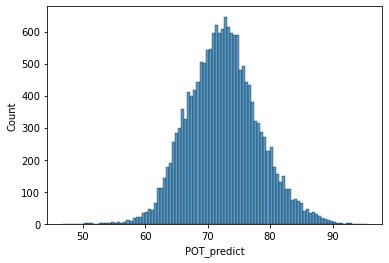

In [50]:
sns.histplot(final["POT_predict"],bins=100)
plt.show()

In [51]:
final = final.reindex(columns=['Name', 'Age', 'BP',"BOV","POT","POT_predict","Value","Wage"])

In [52]:
final.head(30)

Name  Age   BP  BOV  POT  POT_predict     Value   Wage
0      G. Pasquale   33  LWB   71   69    68.674156    625000   7000
1      Luis García   37   CM   70   71    68.108583    600000   7000
2          J. Cole   33  CAM   71   71    71.000000  11000000  15000
3         D. Yorke   36   ST   70   82    76.009232         0      0
4          Iniesta   36  CAM   82   81    78.974351  55000000  12000
5       D. Odonkor   27   RW   66   70    68.046523    725000   5000
6     E. Belözoğlu   38   CM   77   77    74.784397  28000000  44000
7         R. Giggs   39  CAM   78   78    72.188812      1000  60000
8    G. Neville  B   35   CB   78   82    85.197845         0      0
9       P. Scholes   37  CAM   82   80    80.000000    400000  40000
10      P. Neville   35   CB   75   74    73.372290    120000   7000
11      D. Beckham   37   CM   77   78    72.299721         0      0
12        R. Keane   35   CF   81   80    78.073938  55000000  10000
13     S. Campbell   35   CB   75   79    77.688556         0      0
14         O. Kahn   38   GK   87   90    87.134527         0      0
15       D. Hamann   36   CB   67   82    75.513058         0      0
16       A. Okocha   33   CF   76   90    84.946414         0      0
17            Zulu   26   ST   66   72    76.418623         0      0
18    M. Schwarzer   42   GK   73   73    71.706045    500000  15000
19      J. Lehmann   39   GK   81   87    83.586090         0      0
20       G. Király   39   GK   69   69    69.240261         0      0
21  Roberto Carlos   38  CDM   79   79    75.386437         0  30000
22      J. Zanetti   39  CDM   75   75    75.000000      1000  45000
23    A. Del Piero   38  CAM   74   70    71.286815    190000  30000
24        A. Nesta   37   CB   72   73    71.402805         0   6000
25      P. Maldini   40   CB   78   89    84.541977         0      0
26       G. Buffon   42   GK   82   82    79.804335  22000000  41000
27    F. Cannavaro   35   CB   82   89    85.766155         0      0
28           Couto   37   CB   82   84    78.174296         0      0
29      F. Inzaghi   37   ST   72   73    73.000000    350000  15000

In [53]:
top_3 = final.sort_values(by='POT_predict', ascending=False).head(3)
top_3

Name  Age   BP  BOV  POT  POT_predict       Value    Wage
9633      J. Sancho   20  CAM   89   93    95.476169   695000000   82000
9331      K. Mbappé   21   ST   91   95    94.505572  1055000000  160000
9052  G. Donnarumma   21   GK   85   92    94.145106   415000000   34000

In [54]:
top_3_youngsters=final[final['Age'] < 19].sort_values(by='POT_predict', ascending=False).head(3)
top_3_youngsters

Name  Age   BP  BOV  POT  POT_predict      Value   Wage
13576  M. Greenwood   18  CAM   78   89    90.252873  145000000  33000
15221     Ansu Fati   17   LW   76   90    90.004095   15000000  24000
14209  E. Camavinga   17   CM   78   88    89.548888   12000000   5000

In [55]:
top_3_youngsters=final[(final['Value'] < 1000000)&(final['Age'] < 23)].sort_values(by='POT_predict', ascending=False).head(3)
top_3_youngsters

Name  Age   BP  BOV  POT  POT_predict   Value  Wage
8950   Welington Dano   20   LB   81   81    84.256205       0     0
14800        Y. Demir   17  CAM   66   85    83.510619  975000   850
12358        C. Jones   19  CAM   69   84    83.285917  950000  9000

In [56]:
top_3_youngsters=final[(final['Value'] < 3000000)&(final['Age'] < 20)].sort_values(by='POT_predict', ascending=False).head(3)
top_3_youngsters

Name  Age   BP  BOV  POT  POT_predict    Value  Wage
15046      M. Kana   17  CDM   67   85    84.517723  1000000   500
14634  J. Gvardiol   18   CB   71   86    83.822741  2000000   500
14800     Y. Demir   17  CAM   66   85    83.510619   975000   850